In [1]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Review the Train and Test Dataset

In [73]:
import pandas as pd
train_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_ids = test_df['Id']
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling the Missing Values

In [5]:
df_null=pd.DataFrame({
    'Missing Values': train_df.isnull().sum(),
    'Data Type': train_df.dtypes
}).sort_values(by='Missing Values', ascending=False)
df_null.head(20)


,Missing Values,Data Type
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
MasVnrType,872,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageYrBlt,81,float64
GarageCond,81,object
GarageType,81,object


In [6]:
# Fill missing values in object columns with 'No'
train_df.loc[:, train_df.dtypes == 'object'] = train_df.loc[:, train_df.dtypes == 'object'].fillna('No')
test_df.loc[:, test_df.dtypes == 'object'] = test_df.loc[:, test_df.dtypes == 'object'].fillna('No')

# Fill missing values in float and int columns with 0
train_df.loc[:, train_df.dtypes != 'object'] = train_df.loc[:, train_df.dtypes != 'object'].fillna(0)
test_df.loc[:, test_df.dtypes != 'object'] = test_df.loc[:, test_df.dtypes != 'object'].fillna(0)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


# Feature Engineering

<Axes: >

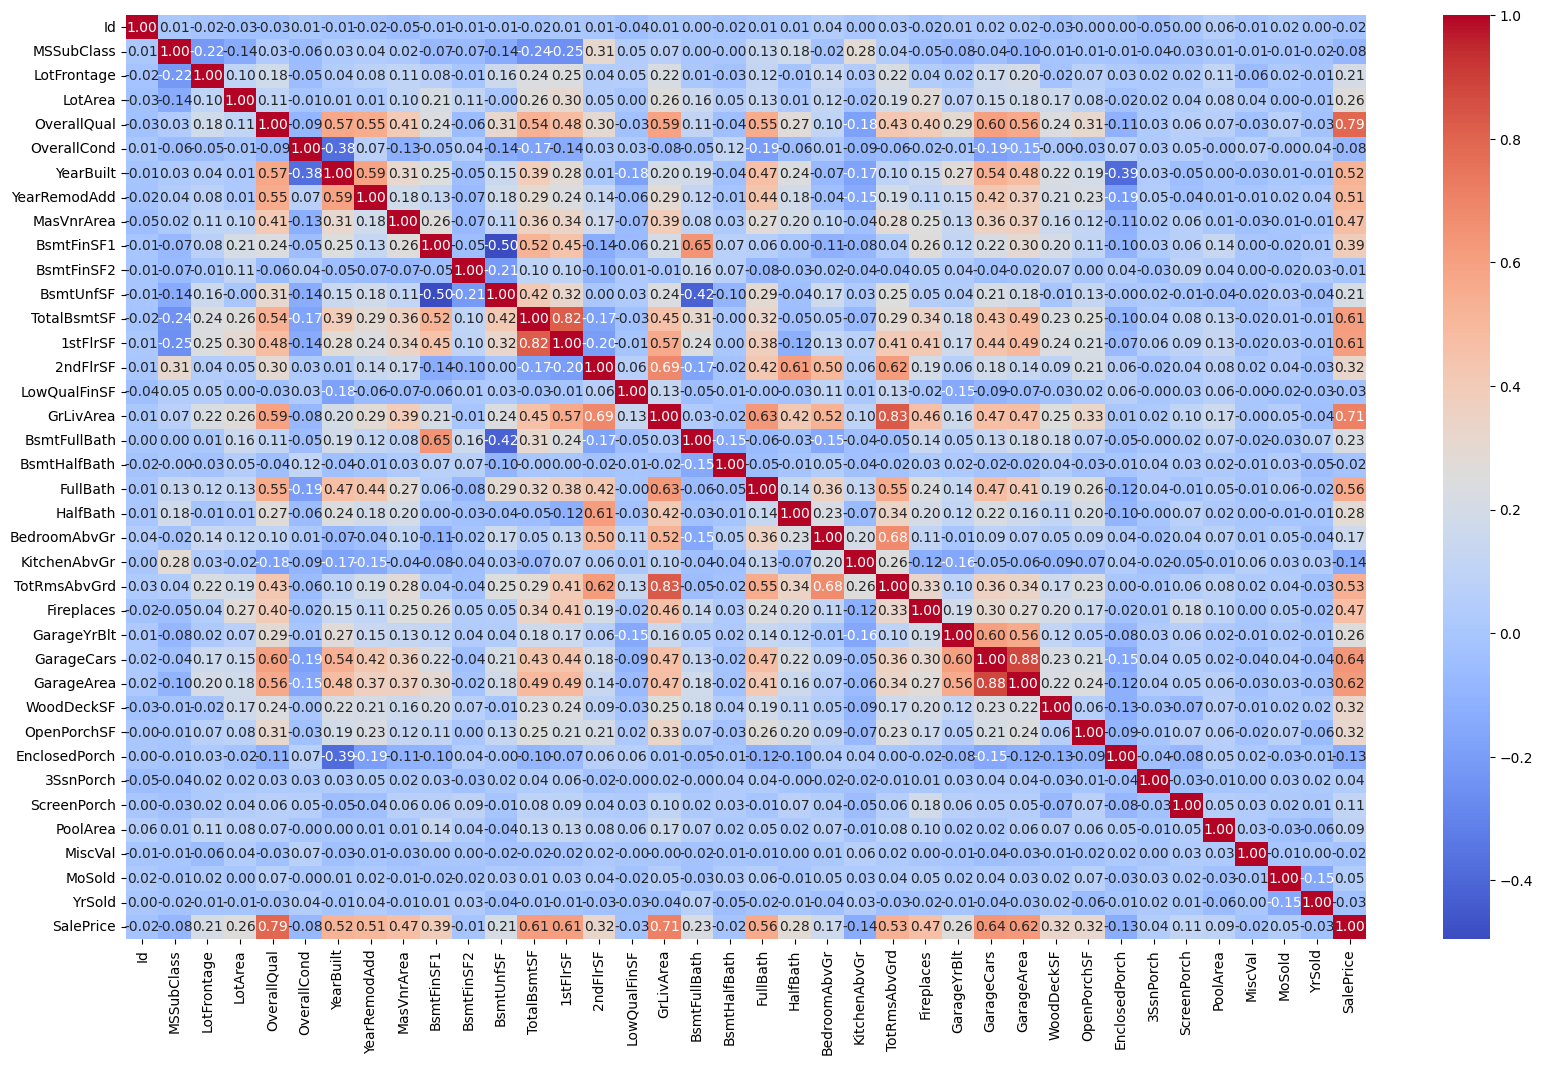

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=train_df.corr(numeric_only=True)

plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#  Compress the features by adding the same categories 

In [10]:
#train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']
df_Bath=train_df[['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath']]
df_Bath                                                       

,BsmtFullBath,FullBath,BsmtHalfBath,HalfBath
0,1,2,0,1
1,0,2,1,0
2,1,2,0,1
3,1,1,0,0
4,1,2,0,1
...,...,...,...,...
1455,0,2,0,1
1456,1,2,0,0
1457,0,2,0,0
1458,1,1,0,0


In [11]:
train_df['TotalBath']=train_df['BsmtFullBath']+train_df['FullBath']+ 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['TotalBath']=test_df['BsmtFullBath']+test_df['FullBath']+ 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])
train_df['TotalBath']

0       3.5
1       2.5
2       3.5
3       2.0
4       3.5
       ... 
1455    2.5
1456    3.0
1457    2.0
1458    2.0
1459    2.5
Name: TotalBath, Length: 1460, dtype: float64

In [12]:
train_df['TotalPorchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['TotalPorchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']
train_df['TotalPorchsf']

0        61
1       298
2        42
3       307
4       276
       ... 
1455     40
1456    349
1457     60
1458    478
1459    804
Name: TotalPorchsf, Length: 1460, dtype: int64

In [13]:
train_df['TotalRooms'] = train_df['TotRmsAbvGrd'] + train_df['FullBath'] + train_df['HalfBath']
test_df['TotalRooms'] = train_df['TotRmsAbvGrd'] + train_df['FullBath'] + train_df['HalfBath']
train_df['TotalRooms']

0       11
1        8
2        9
3        8
4       12
        ..
1455    10
1456     9
1457    11
1458     6
1459     8
Name: TotalRooms, Length: 1460, dtype: int64

In [14]:
train_df['Houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['Houseage'] = test_df['YrSold'] - test_df['YearBuilt']
train_df['Houseage']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: Houseage, Length: 1460, dtype: int64

In [15]:
train_df['HouseReModelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['HouseReModelAge'] = test_df['YrSold'] - test_df['YearRemodAdd']
train_df['HouseReModelAge']

0        5
1       31
2        6
3       36
4        8
        ..
1455     7
1456    22
1457     4
1458    14
1459    43
Name: HouseReModelAge, Length: 1460, dtype: int64

In [16]:
train_df['TotalSf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['TotalSf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']
train_df['TotalSf']

0       2416
1       2240
2       2272
3       1933
4       2853
        ... 
1455    1647
1456    3026
1457    2615
1458    2156
1459    2376
Name: TotalSf, Length: 1460, dtype: int64

In [17]:
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['TotalArea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']
train_df['TotalArea'] 

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalArea, Length: 1460, dtype: int64

In [18]:
train_df['GarageAge'] = 2020 - train_df['GarageYrBlt']
test_df['GarageAge'] = 2020 - test_df['GarageYrBlt']
train_df['GarageAge']

0       17.0
1       44.0
2       19.0
3       22.0
4       20.0
        ... 
1455    21.0
1456    42.0
1457    79.0
1458    70.0
1459    55.0
Name: GarageAge, Length: 1460, dtype: float64

In [19]:
train_df = train_df.drop(columns=['Id','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath', 'OpenPorchSF','3SsnPorch',
                                  'EnclosedPorch','ScreenPorch','WoodDeckSF','TotRmsAbvGrd','FullBath','HalfBath','YrSold','YearBuilt',
                                  'YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','GarageYrBlt'])
                                  
test_df = test_df.drop(columns=['Id','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath', 'OpenPorchSF','3SsnPorch',
                                  'EnclosedPorch','ScreenPorch','WoodDeckSF','TotRmsAbvGrd','FullBath','HalfBath','YrSold','YearBuilt',
                                  'YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','GarageYrBlt'])                               

In [20]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,208500,3.5,61,11,5,5,2416,2566,17.0
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,Normal,181500,2.5,298,8,31,31,2240,2524,44.0
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,Normal,223500,3.5,42,9,7,6,2272,2706,19.0
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,Abnorml,140000,2.0,307,8,91,36,1933,2473,22.0
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,Normal,250000,3.5,276,12,8,8,2853,3343,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,175000,2.5,40,10,8,7,1647,2600,21.0
1456,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,210000,3.0,349,9,32,22,3026,3615,42.0
1457,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,266500,2.0,60,11,69,4,2615,3492,79.0
1458,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,142125,2.0,478,6,60,14,2156,2156,70.0


# Identify the Outliers

In [21]:
def plot_outliers_train_df(x):
    plt.figure(figsize=(4,2))
    sns.scatterplot(x=x, y='SalePrice', data=train_df)
    plt.show()

In [22]:
# Get all non-object columns
non_object_columns = train_df.columns[train_df.dtypes != 'object']
non_object_columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'TotalBath', 'TotalPorchsf',
       'TotalRooms', 'Houseage', 'HouseReModelAge', 'TotalSf', 'TotalArea',
       'GarageAge'],
      dtype='object')

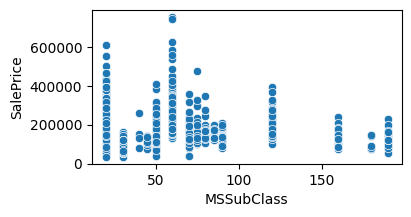

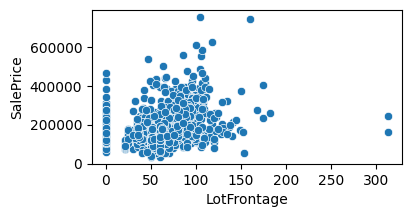

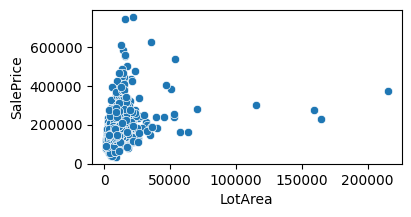

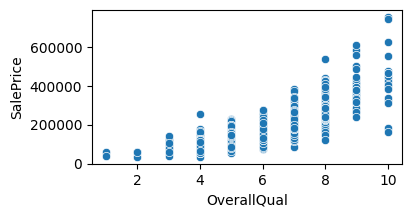

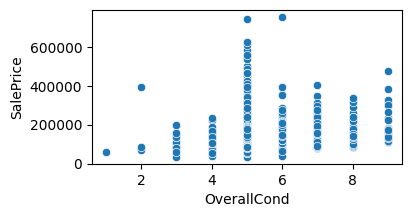

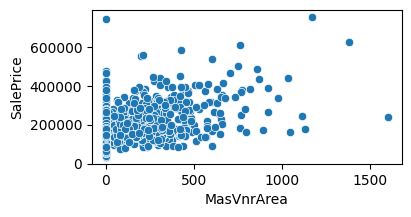

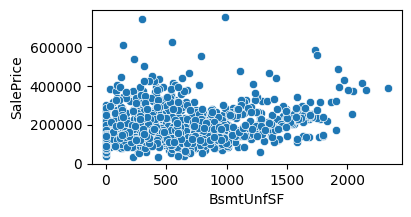

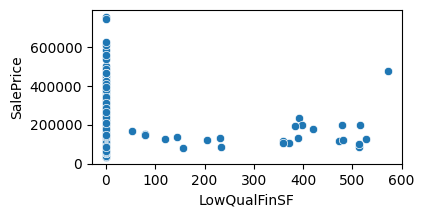

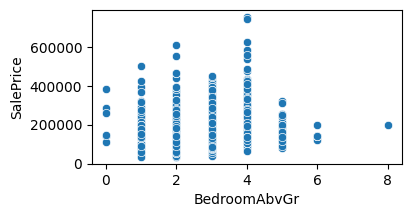

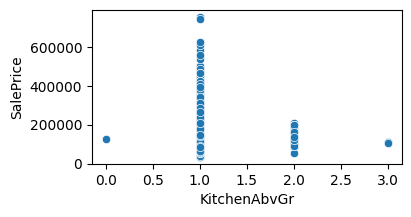

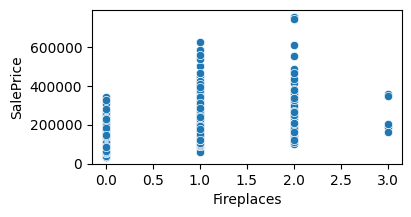

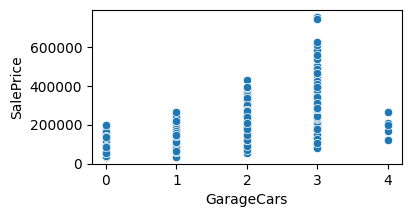

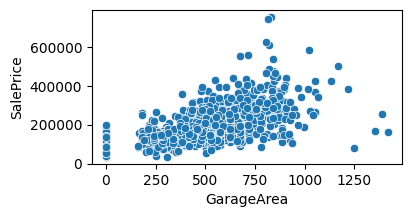

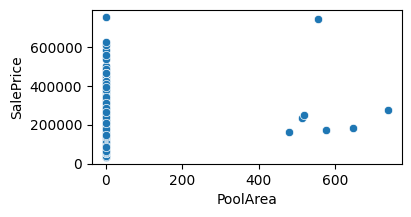

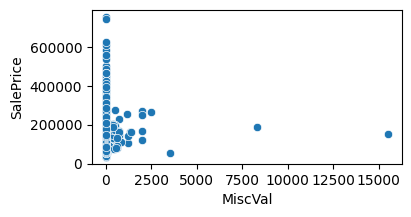

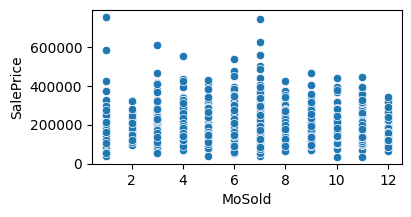

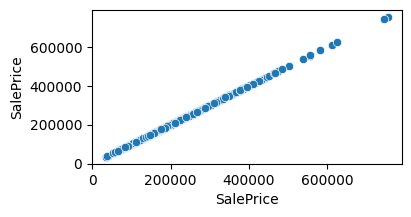

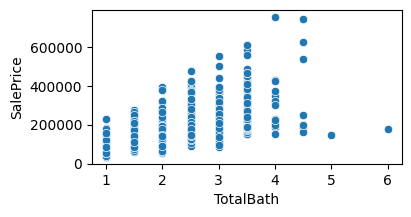

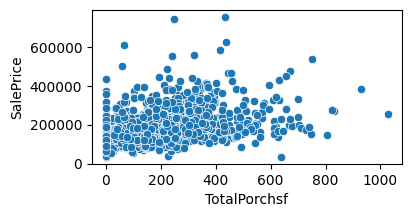

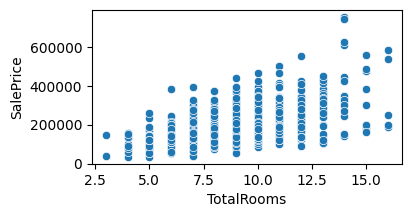

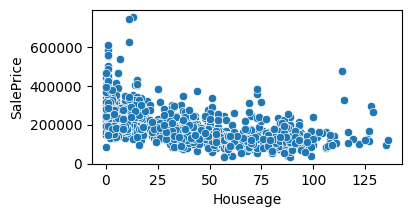

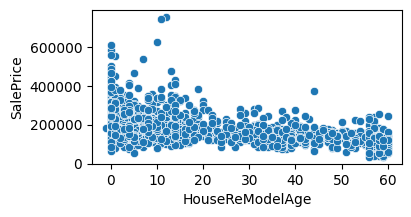

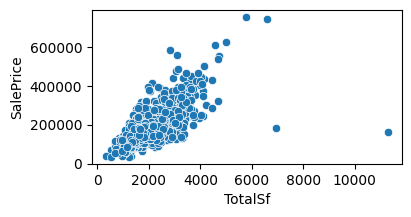

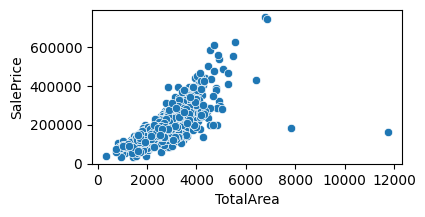

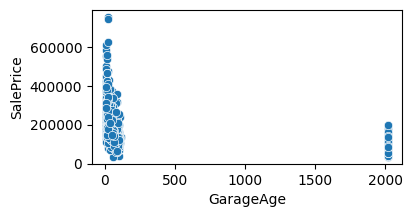

In [23]:
# Loop through each non-object column and pass it to the function
for col in non_object_columns:
    plot_outliers_train_df(col)

In [24]:
# Query the outlier columns based on plot pic
# Identified outliers at 'LotFrontage'>200, 'LotArea'>>100000, 'PoolArea'>100, 'MiscVal'>5000,'TotalSf'>6000, 'TotalArea'>6000,GarageAge']'?
train_df.query('LotFrontage> 200')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
934,20,RL,313.0,27650,Pave,No,IR2,HLS,AllPub,Inside,...,Normal,242000,3.0,0,11,48,1,2494,2654,60.0
1298,60,RL,313.0,63887,Pave,No,IR3,Bnk,AllPub,Corner,...,Partial,160000,4.5,506,15,0,0,11286,11752,12.0


In [25]:
train_df.query('LotArea >100000')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
249,50,RL,0.0,159000,Pave,No,IR2,Low,AllPub,CulDSac,...,Normal,277000,2.5,98,9,49,1,2841,3588,62.0
313,20,RL,150.0,215245,Pave,No,IR3,Low,AllPub,Inside,...,Normal,375000,4.0,0,10,44,44,4092,4172,55.0
335,190,RL,0.0,164660,Grvl,No,IR1,HLS,AllPub,Corner,...,Normal,228950,4.0,670,9,43,43,3182,3285,55.0
706,20,RL,0.0,115149,Pave,No,IR2,Low,AllPub,CulDSac,...,Normal,302000,3.0,428,7,36,5,3043,3467,49.0


In [26]:
train_df.query('PoolArea >100')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
197,75,RL,174.0,25419,Pave,No,Reg,Lvl,AllPub,Corner,...,Abnorml,235000,3.5,568,10,88,16,3940,4472,102.0
810,20,RL,78.0,10140,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,181000,2.5,265,7,32,7,2349,2349,46.0
1170,80,RL,76.0,9880,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,171000,2.0,203,7,31,31,1640,2214,43.0
1182,60,RL,160.0,15623,Pave,No,IR1,Lvl,AllPub,Corner,...,Abnorml,745000,4.5,249,14,11,11,6572,6872,24.0
1298,60,RL,313.0,63887,Pave,No,IR3,Bnk,AllPub,Corner,...,Partial,160000,4.5,506,15,0,0,11286,11752,12.0
1386,60,RL,80.0,16692,Pave,No,IR1,Lvl,AllPub,Inside,...,Normal,250000,4.5,552,16,28,28,4043,4176,42.0
1423,80,RL,0.0,19690,Pave,No,IR1,Lvl,AllPub,CulDSac,...,Alloca,274970,2.0,822,10,40,40,2201,2898,54.0


In [27]:
train_df.query('MiscVal >5000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
346,20,RL,0.0,12772,Pave,No,IR1,Lvl,AllPub,CulDSac,...,Normal,151500,1.0,0,6,47,9,1456,1916,60.0
1230,90,RL,0.0,18890,Pave,No,IR1,Lvl,AllPub,Inside,...,Normal,190000,3.0,324,16,30,30,3329,3981,43.0


In [28]:
train_df.query('TotalSf >6000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
523,60,RL,130.0,40094,Pave,No,IR1,Bnk,AllPub,Inside,...,Partial,184750,4.5,614,15,0,-1,6936,7814,13.0
1182,60,RL,160.0,15623,Pave,No,IR1,Lvl,AllPub,Corner,...,Abnorml,745000,4.5,249,14,11,11,6572,6872,24.0
1298,60,RL,313.0,63887,Pave,No,IR3,Bnk,AllPub,Corner,...,Partial,160000,4.5,506,15,0,0,11286,11752,12.0


In [29]:
train_df.query('TotalArea >6000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
496,20,RL,0.0,12692,Pave,No,IR1,Lvl,AllPub,Inside,...,Normal,430000,4.0,630,13,15,14,4459,6428,28.0
523,60,RL,130.0,40094,Pave,No,IR1,Bnk,AllPub,Inside,...,Partial,184750,4.5,614,15,0,-1,6936,7814,13.0
691,60,RL,104.0,21535,Pave,No,IR1,Lvl,AllPub,Corner,...,Normal,755000,4.0,432,14,13,12,5771,6760,26.0
1182,60,RL,160.0,15623,Pave,No,IR1,Lvl,AllPub,Corner,...,Abnorml,745000,4.5,249,14,11,11,6572,6872,24.0
1298,60,RL,313.0,63887,Pave,No,IR3,Bnk,AllPub,Corner,...,Partial,160000,4.5,506,15,0,0,11286,11752,12.0


# Remove the Outliers

In [30]:
Outliers_Cells=[249,313,335,706,197,810,1170,1182,1298,1386,1423,346,1230,523,1182,1298,496,523,691,1182,1298]
train_df = train_df.drop(Outliers_Cells, axis=0)
train_df.reset_index(drop=True, inplace=True)
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalBath,TotalPorchsf,TotalRooms,Houseage,HouseReModelAge,TotalSf,TotalArea,GarageAge
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,208500,3.5,61,11,5,5,2416,2566,17.0
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,Normal,181500,2.5,298,8,31,31,2240,2524,44.0
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,Normal,223500,3.5,42,9,7,6,2272,2706,19.0
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,Abnorml,140000,2.0,307,8,91,36,1933,2473,22.0
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,Normal,250000,3.5,276,12,8,8,2853,3343,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,175000,2.5,40,10,8,7,1647,2600,21.0
1440,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,210000,3.0,349,9,32,22,3026,3615,42.0
1441,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,266500,2.0,60,11,69,4,2615,3492,79.0
1442,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,...,Normal,142125,2.0,478,6,60,14,2156,2156,70.0


# Cross Validation of Outliers by Z Score

In [31]:
train_df.shape

(1444, 68)

In [32]:
from scipy import stats
train_df['Z_Score']=abs(stats.zscore(train_df['SalePrice']))
train_df=train_df[train_df['Z_Score'] < 3]

# Delete the Z_Score column after removing outliers
train_df=train_df.drop('Z_Score',axis=1)
train_df.shape

(1422, 68)

# Preparation of Encoding the features

In [33]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']
X.shape

(1422, 67)

In [34]:
# Split numerical and categorical columns as list
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Display the results
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'TotalBath', 'TotalPorchsf', 'TotalRooms', 'Houseage', 'HouseReModelAge', 'TotalSf', 'TotalArea', 'GarageAge']

Categorical Columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [35]:
# Splititng the Ordinal and Nominal Columns

ordinal_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
                    'GarageQual', 'PoolQC', 'GarageCond', 'MiscFeature',
                    'OverallQual', 'OverallCond']

ordinal_columns = [col for col in ordinal_columns if col in categorical_columns]

nominal_columns = list(set(categorical_columns) - set(ordinal_columns))



In [64]:
# Creating Pipelines for Encodings

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

numerical_pipeline = Pipeline(steps=[('imputer', 
                                      KNNImputer(n_neighbors=5)) , 
                                     ('stander',StandardScaler()) ])

ordinal_pipeline = Pipeline(steps= [('imputer', 
                                     SimpleImputer(strategy='most_frequent')) , 
                                    ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) ])

nominal_pipeline = Pipeline(steps= [('imputer', 
                                     SimpleImputer(strategy='most_frequent')) , 
                                    ('onehot',OneHotEncoder(handle_unknown='ignore', sparse_output=False)) ])



In [65]:
from sklearn.compose import ColumnTransformer
# Columns Transfer

Col_Transfer = ColumnTransformer(transformers=[
    ('numerical_features', numerical_pipeline, numerical_columns),
    ('ordinal_features', ordinal_pipeline, ordinal_columns),
    ('nominal_features', nominal_pipeline, nominal_columns)
])

In [57]:
Col_Transfer

ColumnTransformer(transformers=[('numerical_features',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('stander',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'MasVnrArea',
                                  'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
                                  'KitchenAbvGr', 'Fireplaces', 'GarageCars',
                                  'GarageArea', 'PoolArea', 'MiscVal', 'MoSold',
                                  'TotalBath', 'TotalP...
                                 ['LotConfig', 'Condition1', 'Utilities',
                                  'Electrical', 'Street', 'GarageType', 'Fence',
                                  'RoofMatl', 'MasVnrType', 'Alley',
                                  'LandContour', 'LandSlope', 'Functional',
                                  'SaleType', 'PavedDrive', 'CentralAir',
                                  'HouseStyle', 'BldgType', 'LotShape',
                                  'BsmtFinType2', 'Foundation', 'Exterior1st',
                                  'MSZoning', 'Exterior2nd', 'SaleCondition',
                                  'BsmtFinType1', 'Heating', 'RoofStyle',
                                  'Condition2', 'Neighborhood'])])

# Final Data Preprocessing 

In [66]:
print(X.shape)
print(test_df.shape)

(1422, 67)
(1459, 67)


In [67]:
for col in nominal_columns + ordinal_columns:
    print(f"{col} - Train unique: {X[col].nunique()} | Test unique: {test_df[col].nunique()}")

LotConfig - Train unique: 5 | Test unique: 5
Condition1 - Train unique: 9 | Test unique: 9
Utilities - Train unique: 2 | Test unique: 2
Electrical - Train unique: 6 | Test unique: 4
Street - Train unique: 2 | Test unique: 2
GarageType - Train unique: 7 | Test unique: 7
Fence - Train unique: 5 | Test unique: 5
RoofMatl - Train unique: 7 | Test unique: 4
MasVnrType - Train unique: 4 | Test unique: 4
Alley - Train unique: 3 | Test unique: 3
LandContour - Train unique: 4 | Test unique: 4
LandSlope - Train unique: 3 | Test unique: 3
Functional - Train unique: 7 | Test unique: 8
SaleType - Train unique: 9 | Test unique: 10
PavedDrive - Train unique: 3 | Test unique: 3
CentralAir - Train unique: 2 | Test unique: 2
HouseStyle - Train unique: 8 | Test unique: 7
BldgType - Train unique: 5 | Test unique: 5
LotShape - Train unique: 4 | Test unique: 4
BsmtFinType2 - Train unique: 7 | Test unique: 7
Foundation - Train unique: 6 | Test unique: 6
Exterior1st - Train unique: 15 | Test unique: 14
MSZoni

In [68]:
Col_Transfer.fit(X)

X_Preprocessed = Col_Transfer.transform(X)
test_df_Preprocessed = Col_Transfer.transform(test_df)

In [69]:
print(X_Preprocessed.shape)
print(test_df_Preprocessed.shape)

(1422, 238)
(1459, 238)


# Splitting the Train Set and Test Set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Preprocessed, y, test_size=0.2, random_state=0)

# Model Creations

In [42]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



# Define the models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Example parameter grid for each model
param_grids = {
    'Linear Regression': {},
    
    'Random Forest': {
        'n_estimators': [100, 500],
        'max_depth': [10, 20, 30]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 500],
        'learning_rate': [0.01, 0.1]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'alpha': [0.001, 0.0001]
    }
}

# Loop over models to perform GridSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Use GridSearchCV for hyperparameter tuning
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model and store it
    best_models[model_name] = grid_search.best_estimator_
    
    # Make predictions
    y_pred = grid_search.predict(X_test)
    
    # Print evaluation metrics
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print('-'*50)



Training Linear Regression...
Linear Regression - Best Parameters: {}
R2 Score: 0.8978
MSE: 478865172.5618
MAE: 15839.2814
--------------------------------------------------
Training Random Forest...


KeyboardInterrupt: 

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print(f"Best R2 Score: {grid_search.best_score_:.4f}")

# Train final model using the best parameters
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the model
print(f"R2 Score: {r2_score(y_test, y_pred_gb):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.4f}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000, 'subsample': 0.9}
Best R2 Score: 0.9190
R2 Score: 0.9161
MSE: 392828543.8201
MAE: 13766.7529


In [72]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

GBR_Model = GradientBoostingRegressor(random_state=42, 
                                      loss='squared_error', 
                                      n_estimators=1000, 
                                      max_depth=5, 
                                      max_features='sqrt', 
                                      min_samples_leaf=2, 
                                      min_samples_split=10,
                                      learning_rate=0.05, 
                                      subsample=0.9)

GBR_Model.fit(X_train, y_train)

y_prediction = GBR_Model.predict(X_test)

print('R2: ', r2_score(y_test, y_prediction))
print('MSE: ', mean_squared_error(y_test, y_prediction))
print('MAE: ', mean_absolute_error(y_test, y_prediction))

R2:  0.9125250818927397
MSE:  409699185.07458466
MAE:  13491.868942486617


# Predicting with Test Data

In [74]:
Prediction = GBR_Model.predict(test_df_Preprocessed)

# Creating the Submission CSV file

In [77]:
Output=pd.DataFrame({'Id':test_ids,'SalePrice':Prediction})
Output

,Id,SalePrice
0,1461,137719.105855
1,1462,167979.961209
2,1463,196080.700021
3,1464,199343.202682
4,1465,186326.890431
...,...,...
1454,2915,86512.112481
1455,2916,82482.279390
1456,2917,177165.793155
1457,2918,131437.702439


In [81]:
Output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
